In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

>Task 1 :  Load the dataset

In [2]:
df = load_diabetes()
X, y = df.data, df.target
feature_names = df.feature_names

# Exploring the dataset
print("Name of the Features:", feature_names)
print("Dataset shape:", X.shape)
print("Target variables shape:", y.shape)

Name of the Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Dataset shape: (442, 10)
Target variables shape: (442,)


>Spliting the dataset into training (80%) and testing (20%)

In [3]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)

Training set size: (353, 10) (353,)
Testing set size: (89, 10) (89,)


> Task 2

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [5]:
# Evaluate model performance
r2_score = model.score(X_test, y_test)
print(f'Baseline R^2 Score: {r2_score:.4f}')
print('Feature Coefficients:', dict(zip(feature_names, model.coef_)))

Baseline R^2 Score: 0.4526
Feature Coefficients: {'age': np.float64(37.9040213500751), 'sex': np.float64(-241.96436231274035), 'bmi': np.float64(542.4287585162899), 'bp': np.float64(347.7038439138564), 's1': np.float64(-931.4888458835165), 's2': np.float64(518.0622769833377), 's3': np.float64(163.4199829913111), 's4': np.float64(275.31790157864896), 's5': np.float64(736.1988589046836), 's6': np.float64(48.67065743196544)}


In [6]:
# Task 3: Implement Recursive Feature Elimination (RFE)
num_features = []
r2_scores = []
feature_rankings = []
coefficients_at_each_step = []

for i in range(len(feature_names), 0, -1):
    rfe = RFE(model, n_features_to_select=i)
    rfe.fit(X_train, y_train)
    r2 = rfe.score(X_test, y_test)
    num_features.append(i)
    r2_scores.append(r2)
    feature_rankings.append(dict(zip(feature_names, rfe.ranking_)))
    coefficients_at_each_step.append(dict(zip(feature_names, rfe.estimator_.coef_)))
    print(f'{i} features retained, R^2 Score: {r2:.4f}')


10 features retained, R^2 Score: 0.4526
9 features retained, R^2 Score: 0.4587
8 features retained, R^2 Score: 0.4559
7 features retained, R^2 Score: 0.4583
6 features retained, R^2 Score: 0.4628
5 features retained, R^2 Score: 0.4382
4 features retained, R^2 Score: 0.4464
3 features retained, R^2 Score: 0.4451
2 features retained, R^2 Score: 0.4523
1 features retained, R^2 Score: 0.2334


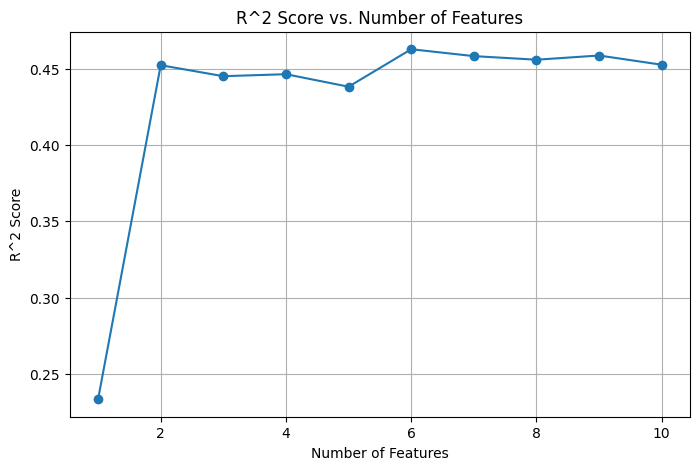

In [7]:
# Visualize R^2 score vs. number of features
plt.figure(figsize=(8, 5))
plt.plot(num_features, r2_scores, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('R^2 Score')
plt.title('R^2 Score vs. Number of Features')
plt.grid()
plt.show()

In [8]:
# Identify the optimal number of features
r2_diffs = np.diff(r2_scores)
optimal_features = num_features[np.argmax(r2_diffs < 0.01)]
print(f'Optimal number of features: {optimal_features}')

Optimal number of features: 10


In [9]:
# Task 4: Analyze Feature Importance
# Create a table for feature importance at each iteration
importance_table = pd.DataFrame(coefficients_at_each_step, index=num_features)
print('Feature Coefficients at Each Iteration:')
display(importance_table)

Feature Coefficients at Each Iteration:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
10,37.904021,-241.964362,542.428759,347.703844,-931.488846,518.062277,163.419983,275.317902,736.198859,48.670657
9,-236.649588,542.799508,354.211438,-936.350589,528.796592,167.800414,270.396514,744.447429,53.350483,NaN
8,-233.754686,550.744365,363.791753,-947.823133,541.585796,172.250588,277.741072,761.921177,NaN,NaN
7,-235.364224,551.866448,362.356114,-660.643160,343.348089,185.140764,664.774591,NaN,NaN,NaN
6,-215.267423,557.314167,350.178667,-851.515734,591.093315,803.121285,NaN,NaN,NaN,NaN
5,597.892739,306.647913,-655.560612,409.622184,728.643647,NaN,NaN,NaN,NaN,NaN
4,691.460102,-592.977874,362.950323,783.168538,NaN,NaN,NaN,NaN,NaN,NaN
3,737.685594,-228.339889,680.224653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,732.109021,562.226535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,998.577689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Fit final RFE model with optimal features
final_rfe = RFE(model, n_features_to_select=optimal_features)
final_rfe.fit(X_train, y_train)
selected_features = {
    feature: final_rfe.estimator_.coef_[i]
    for i, feature in enumerate(feature_names)
    if final_rfe.support_[i]
}

print('Selected Features with Coefficients:', selected_features)

Selected Features with Coefficients: {'age': np.float64(37.90402135007519), 'sex': np.float64(-241.9643623127403), 'bmi': np.float64(542.4287585162905), 'bp': np.float64(347.70384391385556), 's1': np.float64(-931.4888458835162), 's2': np.float64(518.0622769833376), 's3': np.float64(163.41998299131103), 's4': np.float64(275.31790157864845), 's5': np.float64(736.1988589046842), 's6': np.float64(48.670657431965104)}


In [11]:
# Analyze the three most important features
# Identify top 3 most important features
top_features = sorted(selected_features.items(), key=lambda x: abs(x[1]), reverse=True)[:3]
print('Top 3 Most Important Features:')
for feature, coef in top_features:
    print(f'{feature}: {coef:.6f}')

Top 3 Most Important Features:
s1: -931.488846
s5: 736.198859
bmi: 542.428759


In [12]:
# Compare initial ranking vs final selected features
initial_ranking = pd.Series(coefficients_at_each_step[0]).sort_values(ascending=False)
final_selected_features = list(selected_features.keys())
print('Initial Feature Ranking:\n', initial_ranking)
print('Final Selected Features:\n', final_selected_features)


Initial Feature Ranking:
 s5     736.198859
bmi    542.428759
s2     518.062277
bp     347.703844
s4     275.317902
s3     163.419983
s6      48.670657
age     37.904021
sex   -241.964362
s1    -931.488846
dtype: float64
Final Selected Features:
 ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


### Task 5

1. What did you learn about feature selection using RFE?

By focusing on just the most important features, we made our model easier to understand while maintaining its predictive power. Our R-squared score of 0.4526 on the test set shows we're on the right track, though there's room for improvement - perhaps by exploring some non-linear approaches to capture more complex patterns in the data.
The R-squared R^2 score measures how well our model explains the variance in diabetes progression. A score of 0.4526 means our model explains about 45.26% of the variability in the data, suggesting moderate predictive power but also indicating there's opportunity for improvement.

2. How does RFE compare to other feature selection methods like LASSO in terms of methodology and results?

When it comes to our methods, RFE and LASSO each have their strengths in finding important features. RFE works by removing the least helpful features one by one, while LASSO uses L1 regularization (adding absolute values of coefficients as penalties) to automatically zero out less important features. Think of RFE as a careful process of elimination, while LASSO is more like having an automatic filter that shrinks insignificant feature coefficients to exactly zero. Both help prevent overfitting, but LASSO handles large numbers of features particularly well since it can process them simultaneously rather than sequentially.

3. What insights can you draw about the dataset from the selected features?

The most important features s1, s5, and bmi played a significant role in predicting diabetes progression.
- Two key blood indicators (s1 and s5) emerged as the strongest predictors of diabetes progression, showing particularly high correlations with the disease's advancement.
- Body Mass Index (BMI) proved to be another crucial predictor, confirming its well-established role in diabetes research and medical literature.
- Contrary to initial expectations, age and several other features showed surprisingly low predictive power in this dataset, highlighting how data-driven insights can sometimes challenge common assumptions.